In [1]:
import pandas as pd
import numpy as np

In [2]:
import spacy
nlp = spacy.load('en_core_web_sm')
from spacy.lang.en.stop_words import STOP_WORDS
import re
from bs4 import BeautifulSoup
import unicodedata
from textblob import TextBlob
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [3]:
from textblob import Word
from spacy import displacy
from textblob.sentiments import NaiveBayesAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
'''General Feature Extraction
File loading
Word counts
Characters count
Average characters per word
Stop words count
Count #HashTags and @Mentions
If numeric digits are present in twitts
Upper case word counts'''

'General Feature Extraction\nFile loading\nWord counts\nCharacters count\nAverage characters per word\nStop words count\nCount #HashTags and @Mentions\nIf numeric digits are present in twitts\nUpper case word counts'

In [6]:
'''Preprocessing and Cleaning
Lower case
Contraction to Expansion
Emails removal and counts
URLs removal and counts
Removal of RT
Removal of Special Characters
Removal of multiple spaces
Removal of HTML tags
Removal of accented characters
Removal of Stop Words
Conversion into base form of words
Common Occuring words Removal
Rare Occuring words Removal
Word Cloud
Spelling Correction
Tokenization
Lemmatization
Detecting Entities using NER
Noun Detection
Language Detection
Sentence Translation
Using Inbuilt Sentiment Classifier
Advanced Text Processing and Feature Extraction
N-Gram, Bi-Gram etc
Bag of Words (BoW)
Term Frequency Calculation TF
Inverse Document Frequency IDF
TFIDF Term Frequency – Inverse Document Frequency
Word Embedding Word2Vec using SpaCy
Machine Learning Models for Text Classification
SGDClassifier
LogisticRegression
LogisticRegressionCV
LinearSVC
RandomForestClassifier'''

'Preprocessing and Cleaning\nLower case\nContraction to Expansion\nEmails removal and counts\nURLs removal and counts\nRemoval of RT\nRemoval of Special Characters\nRemoval of multiple spaces\nRemoval of HTML tags\nRemoval of accented characters\nRemoval of Stop Words\nConversion into base form of words\nCommon Occuring words Removal\nRare Occuring words Removal\nWord Cloud\nSpelling Correction\nTokenization\nLemmatization\nDetecting Entities using NER\nNoun Detection\nLanguage Detection\nSentence Translation\nUsing Inbuilt Sentiment Classifier\nAdvanced Text Processing and Feature Extraction\nN-Gram, Bi-Gram etc\nBag of Words (BoW)\nTerm Frequency Calculation TF\nInverse Document Frequency IDF\nTFIDF Term Frequency – Inverse Document Frequency\nWord Embedding Word2Vec using SpaCy\nMachine Learning Models for Text Classification\nSGDClassifier\nLogisticRegression\nLogisticRegressionCV\nLinearSVC\nRandomForestClassifier'

In [29]:
df = pd.read_csv('/content/twitter16m.csv', encoding='latin1', header=None)

In [30]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [31]:
df.shape

(1600000, 6)

In [32]:
df = df[[5,0]]

In [33]:
df.columns = ['tweets', 'sentiment']
df.head()

,tweets,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [34]:
df['sentiment'].value_counts()

4    800000
0    800000
Name: sentiment, dtype: int64

In [35]:
sent_map = {0: 'negative', 4 : 'positive'}

### **`Word counts`**

In [36]:
df['word_counts'] = df['tweets'].apply(lambda x: len(str(x).split()))

In [37]:
df.head()

,tweets,sentiment,word_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19
1,is upset that he can't update his Facebook by ...,0,21
2,@Kenichan I dived many times for the ball. Man...,0,18
3,my whole body feels itchy and like its on fire,0,10
4,"@nationwideclass no, it's not behaving at all....",0,21


### **Character counts**

In [38]:
df['char_counts'] = df['tweets'].apply(lambda x: len(x))

In [39]:
df.head()

,tweets,sentiment,word_counts,char_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115
1,is upset that he can't update his Facebook by ...,0,21,111
2,@Kenichan I dived many times for the ball. Man...,0,18,89
3,my whole body feels itchy and like its on fire,0,10,47
4,"@nationwideclass no, it's not behaving at all....",0,21,111


### **Average characters per word**

In [40]:
def get_avg_word_len(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len = word_len + len(word)
    return word_len/len(words)

In [41]:
df['avg_word_len'] = df['tweets'].apply(lambda x: get_avg_word_len(x))

In [42]:
df.head()

,tweets,sentiment,word_counts,char_counts,avg_word_len
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444
3,my whole body feels itchy and like its on fire,0,10,47,3.700000
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714


### **Count of stopwords**

In [44]:
print(STOP_WORDS)

{'sometime', 'made', 'eight', 'hereby', 'ca', 'forty', 'top', 'do', 'becoming', 'n’t', 'say', 'thru', 'nevertheless', 'doing', 'anyway', "n't", 'name', 'at', 'now', 'nothing', 'me', 'is', 'almost', 'across', 'others', 'fifty', 'own', 'along', 'amongst', 'even', 'i', 'quite', 'after', 'so', 'somewhere', 'front', 'their', "'ll", 'against', 'should', 'when', 'these', 'since', 'using', 'besides', 'can', 'only', 'last', 'get', 'over', "'s", 'most', 'where', 'as', 'cannot', 'nine', 'am', 'together', 'make', 'whether', 'among', 'with', 'indeed', 'any', 'toward', 'us', 'less', 'around', 'on', 'yet', 'few', 'then', 'onto', 'did', 'other', 'hers', 'been', 'former', 'neither', 'thence', 'also', 'move', 'has', 'must', 'none', 'seem', 'serious', 'twelve', 'off', 'seems', 'a', 'both', 'himself', '‘d', 'whoever', 'four', 'whenever', 'anything', 'between', 'was', 'up', 'would', 'those', 'yourselves', 'behind', 'sometimes', 'again', 'fifteen', 'show', 'during', 'whom', 'mostly', 'to', 'go', 'never', 'o

In [45]:
df['stop_words_len'] = df['tweets'].apply(lambda x : len([t for t in x.split() if t in STOP_WORDS]))

In [46]:
df.head()

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10


### **Count hashtags and mentions**

In [47]:
df['hashtag_counts'] = df['tweets'].apply(lambda x : len([t for t in x.split() if t.startswith('#')]))
df['mentions_counts'] = df['tweets'].apply(lambda x : len([t for t in x.split() if t.startswith('@')]))

In [48]:
df.head()

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtag_counts,mentions_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0,1
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1


### **Count numeric digits present in tweet**

In [50]:
df['numeric_count'] = df['tweets'].apply(lambda x: len([t for t in x.split() if t.isdigit()]))

In [51]:
df.head()

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtag_counts,mentions_counts,numeric_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0,1,0
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,0,1,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1,0


### **Uppercase words count**

In [56]:
df['upper_count'] = df['tweets'].apply(lambda x: len([t for t in x.split() if t.isupper() and len(x) > 3])) # >3 is to ensure that upper case one digits like I does not appear

In [57]:
df.head()

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtag_counts,mentions_counts,numeric_count,upper_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0,1,0,1
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,0,1,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1,0,1


In [58]:
df.loc[96]['tweets']

"so rylee,grace...wana go steve's party or not?? SADLY SINCE ITS EASTER I WNT B ABLE 2 DO MUCH  BUT OHH WELL....."

## **Preprocessing and cleaning**

### **Lower case conversion**

In [59]:
df['tweets'] = df['tweets'].apply(lambda x: x.lower())

In [60]:
df.head()

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtag_counts,mentions_counts,numeric_count,upper_count
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,0,1,0,1
1,is upset that he can't update his facebook by ...,0,21,111,4.285714,9,0,0,0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1,0,1


### **Contraction to expansion**

In [61]:
# conversion for example from don't to do not know. The below list is obtained from wikipedia

In [62]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how does",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
" u ": " you ",
" ur ": " your ",
" n ": " and "}

In [63]:
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [64]:
df['tweets'] = df['tweets'].apply(lambda x: cont_to_exp(x))

**Emails removal and counts**

In [66]:
df['emails'] = df['tweets'].apply(lambda x: re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', x))

In [67]:
df['emails_count'] = df['emails'].apply(lambda x: len(x))

In [68]:
df.head()

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtag_counts,mentions_counts,numeric_count,upper_count,emails,emails_count
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,0,1,0,1,[],0
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1,[],0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0
4,"@nationwideclass no, it is not behaving at all...",0,21,111,4.285714,10,0,1,0,1,[],0


In [69]:
df[df['emails_count'] >0]

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtag_counts,mentions_counts,numeric_count,upper_count,emails,emails_count
4054,i want a new laptop. hp tx2000 is the bomb. :...,0,20,103,4.150000,6,0,0,0,4,[gabbehhramos@yahoo.com],1
7917,who stole elledell@gmail.com?,0,3,31,9.000000,1,0,0,0,0,[elledell@gmail.com],1
8496,@alexistehpom really? did you send out all th...,0,20,130,5.500000,11,0,1,0,0,[missataari@gmail.com],1
10290,@laureystack awh...that is kinda sad lol add ...,0,8,76,8.500000,0,0,1,0,0,[hello.kitty.65@hotmail.com],1
16413,"@jilliancyork got 2 bottom of it, human error...",0,21,137,5.428571,7,0,1,1,0,[press@linkedin.com],1
...,...,...,...,...,...,...,...,...,...,...,...,...
1588338,@boudoirsextoys do not forget to shoot me an e...,4,21,127,5.047619,10,0,1,0,1,[hello@tastelikekisses.com],1
1589132,"hi there , anybody got a job for me oil &amp;...",4,15,98,5.533333,4,0,0,0,0,[aadvanspijk@yahoo.co.uk],1
1590489,"@clericaaron yes, lbruton@tulsalanparty.com is...",4,14,95,5.785714,6,0,1,0,1,[lbruton@tulsalanparty.com],1
1591675,@miss_ellen good morning!!!! congrats! se...,4,9,77,7.111111,2,0,1,0,0,[jill@q985fm.com],1


###**Count URL' and remove it**###

In [70]:
df['urls_flag'] = df['tweets'].apply(lambda x: len(re.findall(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x)))

In [71]:
df['tweets'] = df['tweets'].apply(lambda x: re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '', x))

In [72]:
df.head()

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtag_counts,mentions_counts,numeric_count,upper_count,emails,emails_count,urls_flag
0,"@switchfoot - awww, that is a bummer. you sh...",0,19,115,5.052632,4,0,1,0,1,[],0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,"@nationwideclass no, it is not behaving at all...",0,21,111,4.285714,10,0,1,0,1,[],0,0


In [74]:
df.loc[0]['tweets']

'@switchfoot  - awww, that is a bummer.  you shoulda got david carr of third day to do it. ;d'

### **Remove RT**

In [75]:
df['tweets'] = df['tweets'].apply(lambda x: re.sub('RT', "", x))

### **Special Chars removal or punctuation removal**

In [76]:
df['tweets'] = df['tweets'].apply(lambda x: re.sub('[^A-Z a-z 0-9-]+', '', x))

In [77]:
df.head()

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtag_counts,mentions_counts,numeric_count,upper_count,emails,emails_count,urls_flag
0,switchfoot - awww that is a bummer you shoul...,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,kenichan i dived many times for the ball manag...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass no it is not behaving at all i...,0,21,111,4.285714,10,0,1,0,1,[],0,0


### **Remove multiple spaces**

In [78]:
df['tweets'] = df['tweets'].apply(lambda x: " ".join(x.split()))

In [79]:
df.head()

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtag_counts,mentions_counts,numeric_count,upper_count,emails,emails_count,urls_flag
0,switchfoot - awww that is a bummer you shoulda...,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,kenichan i dived many times for the ball manag...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass no it is not behaving at all i...,0,21,111,4.285714,10,0,1,0,1,[],0,0


### **Remove HTML tags**

In [81]:
df['tweets'] = df['tweets'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text())

### **Remove Accented Chars**

In [83]:
def remove_accented_chars(x):
    x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return x

In [85]:
df['tweets'] = df['tweets'].apply(lambda x: remove_accented_chars(x))

In [86]:
df.head()

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtag_counts,mentions_counts,numeric_count,upper_count,emails,emails_count,urls_flag
0,switchfoot - awww that is a bummer you shoulda...,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,kenichan i dived many times for the ball manag...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass no it is not behaving at all i...,0,21,111,4.285714,10,0,1,0,1,[],0,0


### **Spacy and NLP**

### **Remove stop words**

In [87]:
df['tweets'] = df['tweets'].apply(lambda x: " ".join([t for t in x.split() if t not in STOP_WORDS]))

In [88]:
df.head()

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtag_counts,mentions_counts,numeric_count,upper_count,emails,emails_count,urls_flag
0,switchfoot - awww bummer shoulda got david car...,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,upset update facebook texting cry result schoo...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,kenichan dived times ball managed save 50 rest...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,body feels itchy like fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass behaving mad,0,21,111,4.285714,10,0,1,0,1,[],0,0


### **Convert into base or root form of word**

In [91]:
def make_to_base(x):
    x_list = []
    doc = nlp(x)
    
    for token in doc:
        lemma = str(token.lemma_)
        if lemma == '-PRON-' or lemma == 'be': # if this is not mentioned, some words are converted into -PRON- and be.
            lemma = token.text
        x_list.append(lemma)
    return " ".join(x_list)

In [92]:
df['tweets'] = df['tweets'].apply(lambda x: make_to_base(x))  # stopped due to time consumption

KeyboardInterrupt: ignored

In [93]:
df.head()

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtag_counts,mentions_counts,numeric_count,upper_count,emails,emails_count,urls_flag
0,switchfoot - awww bummer shoulda got david car...,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,upset update facebook texting cry result schoo...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,kenichan dived times ball managed save 50 rest...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,body feels itchy like fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass behaving mad,0,21,111,4.285714,10,0,1,0,1,[],0,0


### **Common words removal**

In [95]:
' '.join(df.head()['tweets'])

'switchfoot - awww bummer shoulda got david carr day d upset update facebook texting cry result school today blah kenichan dived times ball managed save 50 rest bounds body feels itchy like fire nationwideclass behaving mad'

In [97]:
text = ' '.join(df['tweets'])

In [98]:
text = text.split()

In [99]:
freq_comm = pd.Series(text).value_counts()

In [100]:
freq_comm

good            89366
day             82299
like            77735
-               69662
today           64512
                ...  
swj                 1
babababa            1
14u                 1
univeristity        1
maferzz             1
Length: 787867, dtype: int64

In [102]:
f20 = freq_comm[:20]

In [103]:
#we want to remove top 20 occuring words
f20


good      89366
day       82299
like      77735
-         69662
today     64512
going     64078
love      63421
work      62804
got       60749
time      56081
lol       55094
know      51172
im        50147
want      42070
new       41995
think     41040
night     41029
amp       40616
thanks    39311
home      39168
dtype: int64

In [106]:
df['tweets'] = df['tweets'].apply(lambda x : ' '.join([t for t in x.split() if t not in f20]))

In [107]:
df.head()

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtag_counts,mentions_counts,numeric_count,upper_count,emails,emails_count,urls_flag
0,switchfoot awww bummer shoulda david carr d,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,upset update facebook texting cry result schoo...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,kenichan dived times ball managed save 50 rest...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,body feels itchy fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass behaving mad,0,21,111,4.285714,10,0,1,0,1,[],0,0


### **Rare words removal**

In [108]:
rare20 = freq_comm[-20:]

In [109]:
rare20

loveinjoeinct      1
plansnext          1
thatdreams         1
wes8477            1
romabeauty         1
cusiosity          1
re-writeable       1
imjustmicca        1
napback            1
flowerbutterfly    1
finians            1
revisionmeh        1
mattphotographs    1
kt55bug            1
1346               1
swj                1
babababa           1
14u                1
univeristity       1
maferzz            1
dtype: int64

In [112]:
rare = freq_comm[freq_comm.values == 1] # words which occur only one time. Since removing this will take a lot of time we use rare20

In [111]:
rare

nowcosta        1
l4cey           1
jtrinaa         1
brazilwe        1
ajnie           1
               ..
swj             1
babababa        1
14u             1
univeristity    1
maferzz         1
Length: 536717, dtype: int64

In [113]:
df['tweets'] = df['tweets'].apply(lambda x : ' '.join([t for t in x.split() if t not in rare20]))

In [114]:
df.head()

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtag_counts,mentions_counts,numeric_count,upper_count,emails,emails_count,urls_flag
0,switchfoot awww bummer shoulda david carr d,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,upset update facebook texting cry result schoo...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,kenichan dived times ball managed save 50 rest...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,body feels itchy fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass behaving mad,0,21,111,4.285714,10,0,1,0,1,[],0,0


### **Word Cloud Visualization**

In [116]:
x = ' '.join(text[:20000])

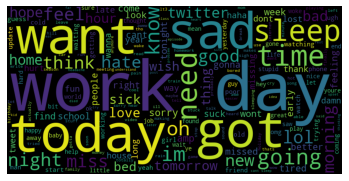

In [117]:
wc = WordCloud(width = 800, height=400).generate(x)
plt.imshow(wc)
plt.axis('off')
plt.show()

### **Spelling Correction**

In [119]:
x = 'tanks forr waching this vidio carri'

In [120]:
x = TextBlob(x).correct()

In [121]:
x

TextBlob("tanks for watching this video carry")

### **Tokenization**

In [122]:
x = 'thanks#watching this video. please like it'

In [125]:
TextBlob(x).words

WordList(['thanks', 'watching', 'this', 'video', 'please', 'like', 'it'])

In [126]:
doc = nlp(x)

In [127]:
for token in doc:
  print(token)

thanks#watching
this
video
.
please
like
it


### **Lemmatization**

In [129]:
x = 'runs run running ran'

In [130]:
for token in x.split():
    print(Word(token).lemmatize())

run
run
running
ran


In [131]:
doc = nlp(x)
for token in doc:
    print(token.lemma_)

run
run
run
run


### **Detect Entities using NER of SpaCy**

In [132]:
x = "Breaking News: Donald Trump, the president of the USA is looking to sign a deal to mine the moon"

In [133]:
doc = nlp(x)
for ent in doc.ents:
    print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

Donald Trump - PERSON - People, including fictional
USA - GPE - Countries, cities, states


In [135]:
displacy.render(doc, style = 'ent', jupyter=True)

### **Detecting Nouns**

In [136]:
for noun in doc.noun_chunks:
    print(noun)

Breaking News
Donald Trump
the president
the USA
a deal
the moon


### **Translation and Language Detection**

Language Code: https://www.loc.gov/standards/iso639-2/php/code_list.php

In [137]:
tb = TextBlob(x)

In [138]:
tb.detect_language()

'en'

In [142]:
tb.translate(to='ml')

TextBlob("ബ്രേക്കിംഗ് ന്യൂസ്: യുഎസ്എ പ്രസിഡന്റ് ഡൊണാൾഡ് ട്രംപ് ചന്ദ്രനെ ഖനനം ചെയ്യുന്നതിനായി ഒരു കരാർ ഒപ്പിടാൻ നോക്കുന്നു")

### **Use inbuilt sentiment classifier**

In [144]:
x = 'we all stands together to fight with corona virus. we will win together'

In [146]:
tb = TextBlob(x, analyzer=NaiveBayesAnalyzer())

In [147]:
tb.sentiment

Sentiment(classification='pos', p_pos=0.8259779151942094, p_neg=0.17402208480578962)

In [148]:
x = 'we all are sufering from corona'

In [149]:
tb = TextBlob(x, analyzer=NaiveBayesAnalyzer())

In [150]:
tb.sentiment

Sentiment(classification='pos', p_pos=0.75616044472398, p_neg=0.2438395552760203)

### **Advanced Text Processing**

### **N-Grams**

In [151]:
'''An N-gram means a sequence of N words. So for example, “KGPtalkie blog” is a 2-gram (a bigram), “A KGPtalkie blog post” is a 4-gram, and “Write on KGPtalkie” is a 3-gram (trigram). Well, that wasn’t very interesting or exciting. True, but we still have to look at the probability used with n-grams, which is quite interesting.'''

'An N-gram means a sequence of N words. So for example, “KGPtalkie blog” is a 2-gram (a bigram), “A KGPtalkie blog post” is a 4-gram, and “Write on KGPtalkie” is a 3-gram (trigram). Well, that wasn’t very interesting or exciting. True, but we still have to look at the probability used with n-grams, which is quite interesting.'

In [152]:
x = 'thanks for watching'

In [153]:
tb = TextBlob(x)

In [155]:
tb.ngrams(3)

[WordList(['thanks', 'for', 'watching'])]

### **Bag of Words BoW**

In [156]:
'''In this section, we are going to discuss a Natural Language Processing technique of text modeling known as the Bag of Words model. Whenever we apply any algorithm in NLP, it works on numbers. We cannot directly feed our text into that algorithm. Hence, the Bag of Words model is used to preprocess the text by converting it into a bag of words, which keeps a count of the total occurrences of most frequently used words.

This model can be visualized using a table, which contains the count of words corresponding to the word itself.'''

'In this section, we are going to discuss a Natural Language Processing technique of text modeling known as the Bag of Words model. Whenever we apply any algorithm in NLP, it works on numbers. We cannot directly feed our text into that algorithm. Hence, the Bag of Words model is used to preprocess the text by converting it into a bag of words, which keeps a count of the total occurrences of most frequently used words.\n\nThis model can be visualized using a table, which contains the count of words corresponding to the word itself.'

In [6]:
x = ['this is first sentence this is', 'this is second', 'this is last']

In [9]:
cv = CountVectorizer(ngram_range=(1,1)) # 1,1 mean considers all unigrams
text_counts = cv.fit_transform(x)

In [10]:
text_counts

<3x6 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [12]:
text_counts.toarray()

array([[1, 2, 0, 0, 1, 2],
       [0, 1, 0, 1, 0, 1],
       [0, 1, 1, 0, 0, 1]])

In [13]:
cv.get_feature_names()

['first', 'is', 'last', 'second', 'sentence', 'this']

In [14]:
bow = pd.DataFrame(text_counts.toarray(), columns = cv.get_feature_names())

In [15]:
bow

,first,is,last,second,sentence,this
0,1,2,0,0,1,2
1,0,1,0,1,0,1
2,0,1,1,0,0,1


### **Term Frequency**

TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).

In [16]:
x

['this is first sentence this is', 'this is second', 'this is last']

In [17]:
bow.shape

(3, 6)

In [18]:
tf = bow.copy()

In [21]:
for row in tf.iterrows():
  print(row)

(0, first       0.166667
is          0.333333
last        0.000000
second      0.000000
sentence    0.166667
this        0.333333
Name: 0, dtype: float64)
(1, first       0.000000
is          0.333333
last        0.000000
second      0.333333
sentence    0.000000
this        0.333333
Name: 1, dtype: float64)
(2, first       0.000000
is          0.333333
last        0.333333
second      0.000000
sentence    0.000000
this        0.333333
Name: 2, dtype: float64)


In [22]:
for row in tf.iterrows():
  print(row[1])

first       0.166667
is          0.333333
last        0.000000
second      0.000000
sentence    0.166667
this        0.333333
Name: 0, dtype: float64
first       0.000000
is          0.333333
last        0.000000
second      0.333333
sentence    0.000000
this        0.333333
Name: 1, dtype: float64
first       0.000000
is          0.333333
last        0.333333
second      0.000000
sentence    0.000000
this        0.333333
Name: 2, dtype: float64


In [29]:
for index, row in enumerate(tf.iterrows()):
  print(index, row[1], row[1].index)

0 first       0.166667
is          0.333333
last        0.000000
second      0.000000
sentence    0.166667
this        0.333333
Name: 0, dtype: float64 Index(['first', 'is', 'last', 'second', 'sentence', 'this'], dtype='object')
1 first       0.000000
is          0.333333
last        0.000000
second      0.333333
sentence    0.000000
this        0.333333
Name: 1, dtype: float64 Index(['first', 'is', 'last', 'second', 'sentence', 'this'], dtype='object')
2 first       0.000000
is          0.333333
last        0.333333
second      0.000000
sentence    0.000000
this        0.333333
Name: 2, dtype: float64 Index(['first', 'is', 'last', 'second', 'sentence', 'this'], dtype='object')


In [19]:
for index, row in enumerate(tf.iterrows()):
    for col in row[1].index:
        tf.loc[index, col] = tf.loc[index, col]/sum(row[1].values)

In [20]:
tf

,first,is,last,second,sentence,this
0,0.166667,0.333333,0.000000,0.000000,0.166667,0.333333
1,0.000000,0.333333,0.000000,0.333333,0.000000,0.333333
2,0.000000,0.333333,0.333333,0.000000,0.000000,0.333333


### **Inverse Document Frequency IDF**

Inverse Document Frequency (IDF) is a weight indicating how commonly a word is used. The more frequent its usage across documents, the lower its score. The lower the score, the less important the word becomes.

For example, the word the appears in almost all English texts and would thus have a very low IDF score as it carries very little “topic” information. In contrast, if you take the word coffee, while it is common, it’s not used as widely as the word the. Thus, coffee would have a higher IDF score than the.

idf = log( (1 + N)/(n + 1)) + 1 used in sklearn when smooth_idf = True

where, N is the total number of rows and n is the number of rows in which the word was present.

In [7]:
x_df = pd.DataFrame(x, columns=['words'])

In [24]:
x_df

,words
0,this is first sentence this is
1,this is second
2,this is last


In [30]:
bow

,first,is,last,second,sentence,this
0,1,2,0,0,1,2
1,0,1,0,1,0,1
2,0,1,1,0,0,1


In [31]:
N = bow.shape[0]

In [32]:
N

3

In [33]:
bb = bow.astype('bool')
bb

,first,is,last,second,sentence,this
0,True,True,False,False,True,True
1,False,True,False,True,False,True
2,False,True,True,False,False,True


In [34]:
bb['is'].sum()

3

In [35]:
cols = bb.columns
cols

Index(['first', 'is', 'last', 'second', 'sentence', 'this'], dtype='object')

In [36]:
nz = []
for col in cols:
    nz.append(bb[col].sum())

In [37]:
nz

[1, 3, 1, 1, 1, 3]

In [38]:
idf = []
for index, col in enumerate(cols):
    idf.append(np.log((N + 1)/(nz[index] + 1)) + 1)

In [39]:
idf # 1.0 as it is present in all the documents

[1.6931471805599454,
 1.0,
 1.6931471805599454,
 1.6931471805599454,
 1.6931471805599454,
 1.0]

TFIDF
TF-IDF which stands for Term Frequency – Inverse Document Frequency. It is one of the most important techniques used for information retrieval to represent how important a specific word or phrase is to a given document. Let’s take an example, we have a string or Bag of Words (BOW) and we have to extract information from it, then we can use this approach.

The tf-idf value increases in proportion to the number of times a word appears in the document but is often offset by the frequency of the word in the corpus, which helps to adjust with respect to the fact that some words appear more frequently in general.

TF-IDF use two statistical methods, first is Term Frequency and the other is Inverse Document Frequency. Term frequency refers to the total number of times a given term t appears in the document doc against (per) the total number of all words in the document and The inverse document frequency measure of how much information the word provides. It measures the weight of a given word in the entire document. IDF show how common or rare a given word is across all documents.

In [41]:
tfidf = TfidfVectorizer()
x_tfidf = tfidf.fit_transform(x_df['words'])

In [42]:
x_tfidf.toarray()

array([[0.45688214, 0.5396839 , 0.        , 0.        , 0.45688214,
        0.5396839 ],
       [0.        , 0.45329466, 0.        , 0.76749457, 0.        ,
        0.45329466],
       [0.        , 0.45329466, 0.76749457, 0.        , 0.        ,
        0.45329466]])

In [43]:
tfidf.idf_

array([1.69314718, 1.        , 1.69314718, 1.69314718, 1.69314718,
       1.        ])

### **Word Embeddings**

In [ ]:
'''Word Embedding is a language modeling technique used for mapping words to vectors of real numbers. It represents words or phrases in vector space with several dimensions. Word embeddings can be generated using various methods like neural networks, co-occurrence matrix, probabilistic models, etc.

SpaCy Word2Vec'''

In [45]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9 MB 1.3 MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-py3-none-any.whl size=829180943 sha256=563c667198ecd9a7efd6cb14268c9c126cbe01da9a7bd3e84b8a34a5de79b60c
  Stored in directory: /tmp/pip-ephem-wheel-cache-sqjqu2f8/wheels/11/95/ba/2c36cc368c0bd339b44a791c2c1881a1fb714b78c29a4cb8f5
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [5]:
nlp = spacy.load('en_core_web_lg')

In [8]:
doc = nlp('thank you! dog cat lion dfasaa')

In [9]:
for token in doc:
    print(token.text, token.has_vector)

thank True
you True
! True
dog True
cat True
lion True
dfasaa False


In [10]:
token.vector.shape

(300,)

In [11]:
nlp('cat').vector.shape

(300,)

In [12]:
for token1 in doc:
    for token2 in doc:
        print(token1.text, token2.text, token1.similarity(token2))
    print()

thank thank 1.0
thank you 0.56475854
thank ! 0.52147406
thank dog 0.25042647
thank cat 0.20648488
thank lion 0.13629763
thank dfasaa 0.0

you thank 0.56475854
you you 1.0
you ! 0.43902233
you dog 0.364941
you cat 0.3080798
you lion 0.20392053
you dfasaa 0.0

! thank 0.52147406
! you 0.43902233
! ! 1.0
! dog 0.29852203
! cat 0.2970235
! lion 0.19601382
! dfasaa 0.0

dog thank 0.25042647
dog you 0.364941
dog ! 0.29852203
dog dog 1.0
dog cat 0.80168545
dog lion 0.47424486
dog dfasaa 0.0

cat thank 0.20648488
cat you 0.3080798
cat ! 0.2970235
cat dog 0.80168545
cat cat 1.0
cat lion 0.5265438
cat dfasaa 0.0

lion thank 0.13629763
lion you 0.20392053
lion ! 0.19601382
lion dog 0.47424486
lion cat 0.5265438
lion lion 1.0
lion dfasaa 0.0

dfasaa thank 0.0
dfasaa you 0.0
dfasaa ! 0.0
dfasaa dog 0.0
dfasaa cat 0.0
dfasaa lion 0.0
dfasaa dfasaa 1.0



/usr/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty v

### **Machine Learning Models for Text Classification**

### **BoW**

In [ ]:
df.shape

In [ ]:
df0 = df[df['sentiment']==0].sample(2000)
df4 = df[df['sentiment']==4].sample(2000)

In [ ]:
dfr = df0.append(df4)

In [ ]:
dfr.shape

In [ ]:
#removing the tweets,sentiment and emails columns

dfr_feat = dfr.drop(labels=['tweets','sentiment','emails'], axis = 1).reset_index(drop=True)

In [ ]:
dfr_feat

In [ ]:
y = dfr['sentiment']

In [ ]:
cv = CountVectorizer()
text_counts = cv.fit_transform(dfr['tweets'])

In [ ]:
text_counts.toarray().shape

In [ ]:
dfr_bow = pd.DataFrame(text_counts.toarray(), columns=cv.get_feature_names())

In [ ]:
dfr_bow.head()

### **ML Algorithms**
### Importing Libraries for ML algorithms **bold text**

In [ ]:
sgd = SGDClassifier(n_jobs=-1, random_state=42, max_iter=200)
lgr = LogisticRegression(random_state=42, max_iter=200)
lgrcv = LogisticRegressionCV(cv = 2, random_state=42, max_iter=1000)
svm = LinearSVC(random_state=42, max_iter=200)
rfc = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=200)

In [ ]:
clf = {'SGD': sgd, 'LGR': lgr, 'LGR-CV': lgrcv, 'SVM': svm, 'RFC': rfc}

In [ ]:
clf.keys()

In [ ]:
dict_keys(['SGD', 'LGR', 'LGR-CV', 'SVM', 'RFC'])

In [ ]:
#here, we are training our model by defining the function classify.

def classify(X, y):
    scaler = MinMaxScaler(feature_range=(0, 1))
    X = scaler.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
    
    for key in clf.keys():
        clf[key].fit(X_train, y_train)
        y_pred = clf[key].predict(X_test)
        ac = accuracy_score(y_test, y_pred)
        print(key, " ---> ", ac)

In [ ]:
%%time
classify(dfr_bow, y)

### **Manual Feature**

In [ ]:
#passing all the manual features.

dfr_feat.head(2)

In [ ]:
%%time
classify(dfr_feat, y)

### **Manual + Bow**

In [ ]:
#passing all the manual features along with bag of words features.

X = dfr_feat.join(dfr_bow)

In [ ]:
%%time
classify(X, y)

### **TFIDF**

In [ ]:
dfr.shape

In [ ]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(dfr['tweets'])

In [ ]:
%%time
classify(pd.DataFrame(X.toarray()), y)

### **Word2Vec**

In [ ]:
def get_vec(x):
    doc = nlp(x)
    return doc.vector.reshape(1, -1)

In [ ]:
%%time
dfr['vec'] = dfr['tweets'].apply(lambda x: get_vec(x))

In [ ]:
X = np.concatenate(dfr['vec'].to_numpy(), axis = 0)

In [ ]:
X.shape

In [ ]:
classify(pd.DataFrame(X), y)

In [ ]:
def predict_w2v(x):
    for key in clf.keys():
        y_pred = clf[key].predict(get_vec(x))
        print(key, "-->", y_pred)

In [ ]:
predict_w2v('hi, thanks for watching this video. please like and subscribe')

In [ ]:
predict_w2v('please let me know if you want more video')

In [ ]:
predict_w2v('congratulation looking good congrats')